<a href="https://colab.research.google.com/github/d1sturb3d/ml-demos/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Author - Shardul Khadye

# Description - Testing LSTM to predict stock prices

In [19]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [20]:
df = web.DataReader('AAPL',data_source='yahoo',start='2016-01-01',end='2021-01-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


Text(0.5, 0, 'Date')

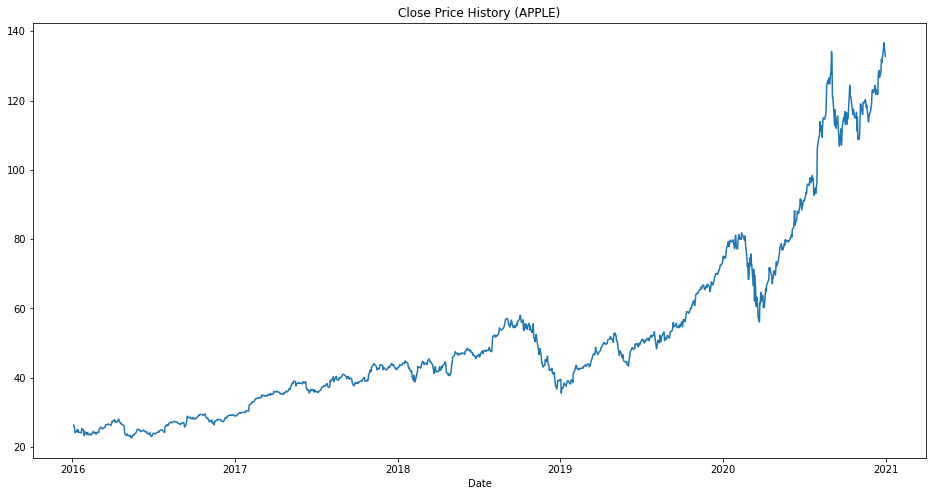

In [21]:
# Visualisation of closing price

plt.figure(figsize=(16,8))
plt.title('Close Price History (APPLE)')
plt.plot(df['Close'])
plt.xlabel('Date')

In [22]:
data = df.filter(['Close'])

dataset = data.values

#using 80% for training

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1008

In [23]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03288638],
       [0.02710224],
       [0.02269839],
       ...,
       [0.98404971],
       [0.97397133],
       [0.96494457]])

In [25]:
train_data = scaled_data[0:training_data_len,:]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.03288638, 0.02710224, 0.02269839, 0.01338679, 0.01450419,
       0.017944  , 0.02107708, 0.01544631, 0.02011305, 0.01487665,
       0.01384691, 0.01413173, 0.01305816, 0.02427589, 0.01993779,
       0.02114281, 0.00674817, 0.00821612, 0.01533675, 0.01334298,
       0.00907061, 0.0131677 , 0.01371544, 0.00806275, 0.01023182,
       0.01018799, 0.00861049, 0.00736164, 0.00799702, 0.01380308,
       0.01704572, 0.01297052, 0.01248851, 0.01432891, 0.00953071,
       0.01261996, 0.014066  , 0.01439465, 0.01391264, 0.02232593,
       0.02280795, 0.02445117, 0.02775953, 0.02526183, 0.02342141,
       0.02361861, 0.02372815, 0.02611631, 0.02668595, 0.03119935,
       0.03424478, 0.03387232, 0.03413523, 0.03411333, 0.03588801,
       0.03459533, 0.03358749, 0.03253583, 0.03799133, 0.04211034])]
[0.04086148936769132]

[array([0.03288638, 0.02710224, 0.02269839, 0.01338679, 0.01450419,
       0.017944  , 0.02107708, 0.01544631, 0.02011305, 0.01487665,
       0.01384691, 0.01413173, 0.01

In [26]:
#converting to numpy arrays

x_train,y_train = np.array(x_train), np.array(y_train)

In [27]:
#LSTM needs 3d data

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(948, 60, 1)

In [31]:
#LSTM
model = Sequential()

model.add(LSTM(50,return_sequences=True , input_shape =(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [34]:
## Training

model.fit(x_train,y_train,batch_size=1,epochs=1)

948/948 [==============================] - 24s 23ms/step - loss: 0.0014


In [35]:
# Create testing dataset

test_data = scaled_data[training_data_len-60:,:]

x_test =[]
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [36]:
# converting to numpy array

x_test = np.array(x_test)

In [37]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [38]:
# Predicted Values

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

In [40]:
# RMSE

rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

4.037520116068928


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


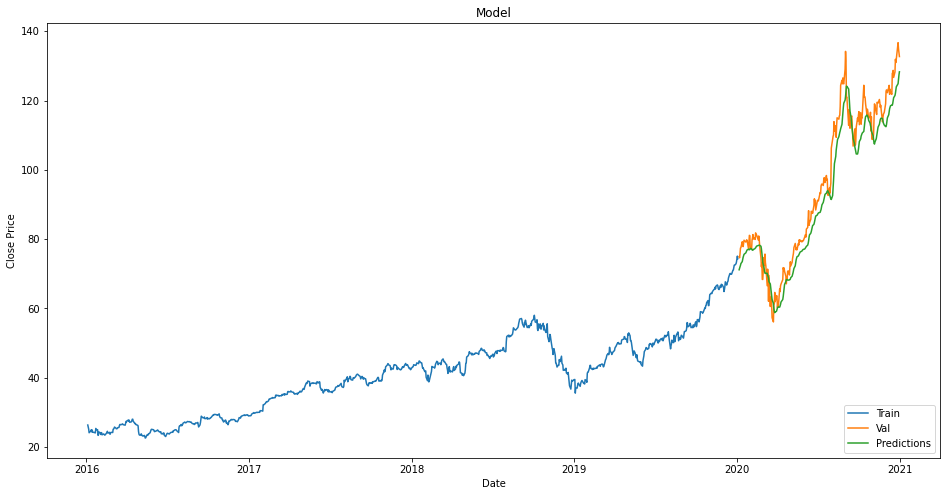

In [41]:
# Visualizing

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']  = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc= 'lower right')
plt.show()

In [42]:
valid

,Close,Predictions
Date,,
2020-01-06,74.949997,71.149467
2020-01-07,74.597504,71.630714
2020-01-08,75.797501,72.013641
2020-01-09,77.407501,72.417435
2020-01-10,77.582497,72.944183
...,...,...
2020-12-24,131.970001,123.951126
2020-12-28,136.690002,124.860863
2020-12-29,134.869995,126.200317


In [49]:
apple_quote= web.DataReader('AAPL',data_source='yahoo',start = '2016-01-01',end = '2021-04-17')
apple_quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154
...,...,...,...,...,...,...
2021-04-12,132.850006,130.630005,132.520004,131.240005,91420000.0,131.240005
2021-04-13,134.660004,131.929993,132.440002,134.429993,91266500.0,134.429993
2021-04-14,135.000000,131.660004,134.940002,132.029999,87222800.0,132.029999


In [50]:
new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [51]:
pred_price = model.predict(X_test)

In [52]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[128.21445]]


In [57]:
apple_quote_new = web.DataReader('AAPL',data_source='yahoo',start = '2021-04-15',end = '2021-04-15')

In [58]:
apple_quote_new

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-15,135,133.639999,133.820007,134.5,89347100,134.5
